In [1]:
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
bc = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/BreastCancer.csv")

In [3]:
print(bc.columns)
bc.head()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Another One

In [6]:
liz = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Lizzo_data.csv")
liz.columns

,Unnamed: 0,artist_name,artist_id,album_id,album_type,album_release_date,album_release_year,album_release_date_precision,danceability,energy,...,track_name,track_preview_url,track_number,type,track_uri,external_urls.spotify,album_name,key_name,mode_name,key_mode
0,1,Lizzo,56oDRnqbIiwx4mymNEv7dS,6dFFcYQ8VhifgdKgYY5LYL,album,2019-04-19,2019,day,0.566,0.660,...,Cuz I Love You,https://p.scdn.co/mp3-preview/04472d81bc5a9669...,1,track,spotify:track:6YdQgWSpsxhVeX6Xmv3IFJ,https://open.spotify.com/track/6YdQgWSpsxhVeX6...,Cuz I Love You,C#,major,C# major
1,2,Lizzo,56oDRnqbIiwx4mymNEv7dS,6dFFcYQ8VhifgdKgYY5LYL,album,2019-04-19,2019,day,0.694,0.807,...,Like a Girl,https://p.scdn.co/mp3-preview/4f917112d7f75e2c...,2,track,spotify:track:5I7sGubUsKo4mVJpBoSVUr,https://open.spotify.com/track/5I7sGubUsKo4mVJ...,Cuz I Love You,D,major,D major
2,3,Lizzo,56oDRnqbIiwx4mymNEv7dS,6dFFcYQ8VhifgdKgYY5LYL,album,2019-04-19,2019,day,0.767,0.889,...,Juice,https://p.scdn.co/mp3-preview/7ca1598cec36c491...,3,track,spotify:track:0k664IuFwVP557Gnx7RhIl,https://open.spotify.com/track/0k664IuFwVP557G...,Cuz I Love You,G,major,G major
3,4,Lizzo,56oDRnqbIiwx4mymNEv7dS,6dFFcYQ8VhifgdKgYY5LYL,album,2019-04-19,2019,day,0.693,0.849,...,Soulmate,https://p.scdn.co/mp3-preview/467bc6a734bfb66e...,4,track,spotify:track:6h2wpo2pshM8QnAvRySEO0,https://open.spotify.com/track/6h2wpo2pshM8QnA...,Cuz I Love You,G,major,G major
4,5,Lizzo,56oDRnqbIiwx4mymNEv7dS,6dFFcYQ8VhifgdKgYY5LYL,album,2019-04-19,2019,day,0.674,0.542,...,Jerome,https://p.scdn.co/mp3-preview/8f662de51ad3f613...,5,track,spotify:track:3kxsEF30mM0TZWfkOv4XsS,https://open.spotify.com/track/3kxsEF30mM0TZWf...,Cuz I Love You,G#,major,G# major


In [8]:
features = ['danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo']
z = StandardScaler()

liz = liz[features]
liz[features] = z.fit_transform(liz[features])

In [10]:
pca = PCA()
pca.fit(liz[features])

print(pca.explained_variance_ratio_)

[0.31926823 0.15601168 0.13444894 0.10646081 0.09352151 0.07231293
 0.05557962 0.03822546 0.02417083]


In [12]:
pcaDF = pd.DataFrame({"explained_var": pca.explained_variance_ratio_,
                     "pc": range(1,10),
                     "cumulative_exp_var": pca.explained_variance_ratio_.cumsum()})
pcaDF.head()

,explained_var,pc,cumulative_exp_var
0,0.319268,1,0.319268
1,0.156012,2,0.475280
2,0.134449,3,0.609729
3,0.106461,4,0.716190
4,0.093522,5,0.809711


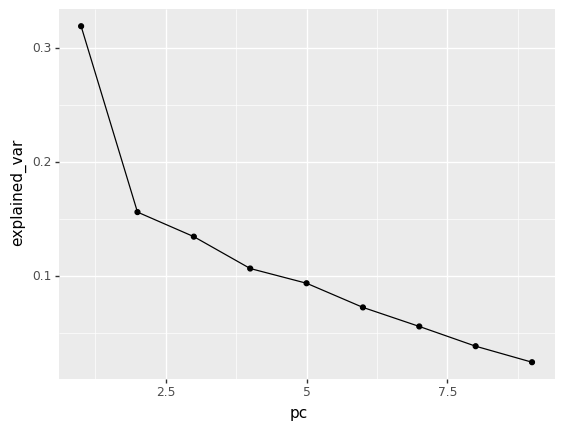

<ggplot: (308991347)>

In [14]:
(ggplot(pcaDF, aes(x = "pc", y = "explained_var")) + geom_point() + geom_line())

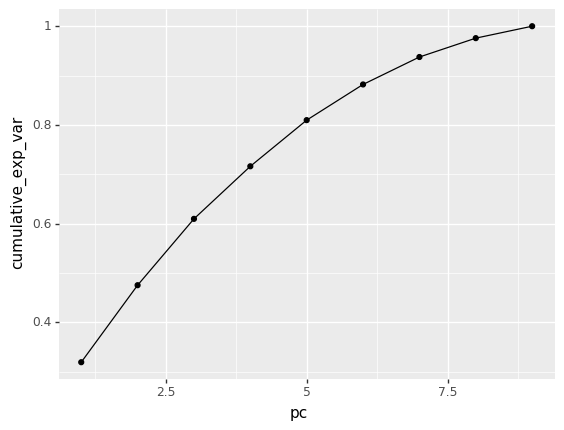

<ggplot: (313421297)>

In [15]:
(ggplot(pcaDF, aes(x = "pc", y = "cumulative_exp_var")) + geom_point() + geom_line())